# Unconstrained optimization algorithms

Stepsize and directions

-------------------------------


## Steepest descent

In [1]:
import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import jacfwd, jacrev
from jax import random
import numpy as np
import sympy as sym


In [3]:
## test jax: evaluate cost function
def cost(x):
    cost = 3*pow(x[0], 2) + pow(x[1], 4)
    return cost
x0 = jnp.array([1.0, -2.0])

### Test helper functions

In [5]:
## test gradient direction

def get_gradient_direction(cost, x_val, direction_type): 
    
    # get derivative of the cost function
    derivative = grad(cost)(x_val)

    if direction_type is 'steepest_descent':        
        # D in case of steepest descent is identity matrix
        D = jnp.identity(len(x_val))
        direction = - jnp.matmul(D, derivative)  
        
    elif direction_type is 'newton_method':
        hessian = jacfwd(jacrev(cost))(x_val)
        D = jnp.linalg.inv(hessian)
        direction = - jnp.matmul(D, derivative)
        
    else:
        raise Exception('Unknown gradient based method, please input one of the following: steepst_descent, newton_method')
                        
    return direction

direction = get_gradient_direction(cost, x0, 'newton_method')
direction

DeviceArray([-1.       ,  0.6666667], dtype=float32)

In [5]:
## test step size
import sympy as sym

def get_step_size(cost, x_current, direction, step_size_type, alpha_cons=None):
    # create symbolic step size: alpha
    alpha = sym.Symbol('alpha')
    # convert jax device array to numpy list
    x_current = x_current.tolist()
    direction = direction.tolist()
    
    if step_size_type is 'minimization_rule':
        sym_vec = []
        for l in range(len(direction)):
            mm = x_current[l] + alpha*direction[l] 
            sym_vec.append(mm)
        sym_cost = cost(sym_vec)
        sym_derivative = sym.diff(sym_cost, alpha)
        alpha_sym = sym.solveset(sym_derivative, alpha)
        alpha_sym = list(alpha_sym)
        
        # only keep the real number by checking data type
        i = 0
        while True:
            condition = type(alpha_sym[i]**2) is sym.numbers.Float
            if condition is True:
                val = alpha_sym[i]
                break
            else:
                i += 1
        
        alpha = float(val)
            
    elif step_size_type is 'constant':
        alpha = alpha_cons
 
    elif step_size_type is 'armijo rule':
        
    else:
        raise Exception('Unknown step size type, please input one of the following: minimization_tule, constant, armijo rule')

    return alpha

x0 = jnp.array([1.0, -2.0])
direction = get_gradient_direction(cost, x0, 'steepest_descent')
alpha = get_step_size(cost, x0, direction, 'minimization_rule')
print(alpha)

IndentationError: expected an indented block (<ipython-input-5-648ad0b4bc54>, line 38)

In [21]:
# Test Armijo's rule

def armijo_condition(alpha, sigma, cost, x_current, x_next, direction):
    LHS = cost(x_current) - cost(x_next)
    RHS = - sigma * alpha * jnp.matmul(grad(cost)(x_current), direction)
    print('LHS:{}, RHS:{}'.format(LHS, RHS))
    condition = True if (LHS >= RHS) else False
    return condition 

# hyperparameters
beta = 0.5
s = 1
sigma = 0.1
m = 0
condition = False
x0 = jnp.array([1.0, -2.0])
x_current = x0

while True:
    print('m = {}'.format(m))
    alpha = pow(beta, m) * s
    direction = get_gradient_direction(cost, x_current, 'steepest_descent')
    x_next = x_current + alpha * direction
    condition = armijo_condition(alpha, sigma, cost, x_current, x_next, direction)
    print('m: {}, alpha: {}, x_current: {}, x_next: {}, condition: {}'.format(
        m, alpha, x_current, x_next, condition))
    print('---------------')

    if condition is True:
        break
    m += 1

# hyperparameters
beta = 0.5
s = 1
sigma = 0.1
m = 0
condition = False
x0 = jnp.array([1.0, -2.0])
x_current = x0

LHS = cost(x_current) - cost(x_next)
RHS = -sigma * pow(beta, m) * s * jnp.matmul(grad(cost)(x_current), direction)
print(LHS)
print(RHS)
print(direction)

m = 0
LHS:-810056.0, RHS:106.0
m: 0, alpha: 1.0, x_current: [ 1. -2.], x_next: [-5. 30.], condition: False
---------------
m = 1
LHS:-38409.0, RHS:53.0
m: 1, alpha: 0.5, x_current: [ 1. -2.], x_next: [-2. 14.], condition: False
---------------
m = 2
LHS:-1277.75, RHS:26.5
m: 2, alpha: 0.25, x_current: [ 1. -2.], x_next: [-0.5  6. ], condition: False
---------------
m = 3
LHS:2.8125, RHS:13.25
m: 3, alpha: 0.125, x_current: [ 1. -2.], x_next: [0.25 2.  ], condition: False
---------------
m = 4
LHS:17.828125, RHS:6.625
m: 4, alpha: 0.0625, x_current: [ 1. -2.], x_next: [0.625 0.   ], condition: True
---------------
17.828125
106.0
[-6. 32.]


--------------------------------------------------------

## Helper functions

In [73]:

def cost(x):
    cost = 3*pow(x[0], 2) + pow(x[1], 4)
    return cost


def armijo_condition(alpha, sigma, cost, x_current, x_next, direction):
    LHS = cost(x_current) - cost(x_next)
    RHS = - sigma * alpha * jnp.matmul(grad(cost)(x_current), direction)
    condition = True if (LHS >= RHS) else False
    return condition 


def get_step_size(cost, x_current, direction, step_size_type,
                 beta=None, s=None, sigma=None, alpha_cons=None):

    
    if step_size_type is 'minimization_rule':
        # create symbolic step size: alpha
        alpha = sym.Symbol('alpha')
        # convert jax device array to numpy list
        x_current = x_current.tolist()
        direction = direction.tolist()
        sym_vec = []
        for l in range(len(direction)):
            mm = x_current[l] + alpha*direction[l] 
            sym_vec.append(mm)
        sym_cost = cost(sym_vec)
        sym_derivative = sym.diff(sym_cost, alpha)
        alpha_sym = sym.solveset(sym_derivative, alpha)
        alpha_sym = list(alpha_sym)
        
        # only keep the real number by checking data type
        i = 0
        while True:
            condition = type(alpha_sym[i]**2) is sym.numbers.Float
            if condition is True:
                val = alpha_sym[i]
                break
            else:
                i += 1
        
        alpha = float(val)
            
    elif step_size_type is 'constant':
        alpha = alpha_cons
 
    elif step_size_type is 'armijo_rule':
        m = 0
        condition = False

        while True:
            alpha = pow(beta, m) * s
            x_next = x_current + alpha * direction
            condition = armijo_condition(alpha, sigma, cost, x_current, x_next, direction)

            if condition is True:
                break
            m += 1


    else:
        raise Exception('Unknown step size type, please input one of the following: minimization_tule, constant, armijo rule')

    return alpha
    

def run_algorithm(x0, direction_type, step_size_type, beta=None, s=None, sigma=None):
    x0 = jnp.array(x0)
    x_current = x0
    X_cache = []

    for i in range(T):
        X_cache.append(np.asarray(x_current, dtype=float))
        direction = get_gradient_direction(cost, x_current, direction_type) 
        step_size = get_step_size(cost, x_current, direction, step_size_type, beta, s, sigma) 
        x_next = x_current + step_size * direction
        x_current = x_next

    # save all co-ordinates into X_cache for visualization
    X_cache.append(np.asarray(x_next, dtype=float))
    
    return X_cache

------------------------------------------------------

## Run algorithm

In [100]:

# hyperparameters for armijo rule
beta = 0.5
s = 1
sigma = 0.1

# initial condition
x0 = [1.0, -2.0]

# number of iterations
T = 10


X_cache = run_algorithm(x0, 'steepest_descent', 'armijo_rule', beta, s, sigma)
X_cache_newton_minimization = run_algorithm(x0, 'newton_method', 'minimization_rule', beta, s, sigma)



## Visualization

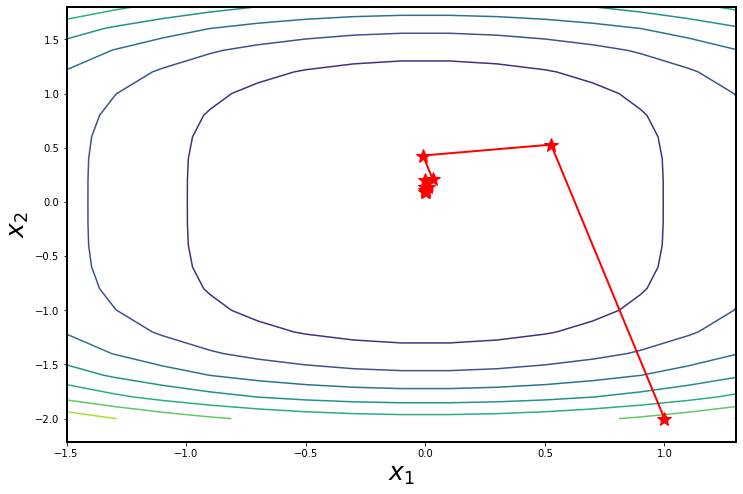

In [102]:
import matplotlib.pyplot as plt


def cost_2d(X, Y):
    cost_2d = 3*pow(X, 2) + pow(Y, 4)
    return cost_2d

f = plt.figure(figsize=(12, 8))
plt.rc('axes', linewidth=2)

x, y = np.arange(-1.5, 1.5, 0.2), np.arange(-2.0, 2.0, 0.2)
X, Y = np.meshgrid(x, y)
F = cost_2d(X, Y)
plt.plot([X_cache[i][0] for i in range(len(X_cache))], 
            [X_cache[i][1] for i in range(len(X_cache))], '-*', color='red', markersize=15, lw=2.0)
plt.scatter(1, -2, 50)
plt.contour(X, Y, F)
plt.xlabel('$x_1$', size=25)
plt.ylabel('$x_2$', size=25)
dist = []
for i in range(len(X_cache)):
    d = np.sqrt(X_cache[i][0]**2 + X_cache[i][1]**2)
    dist.append(d)
    f.savefig("steepest_descent_armijo.pdf", bbox_inches='tight')

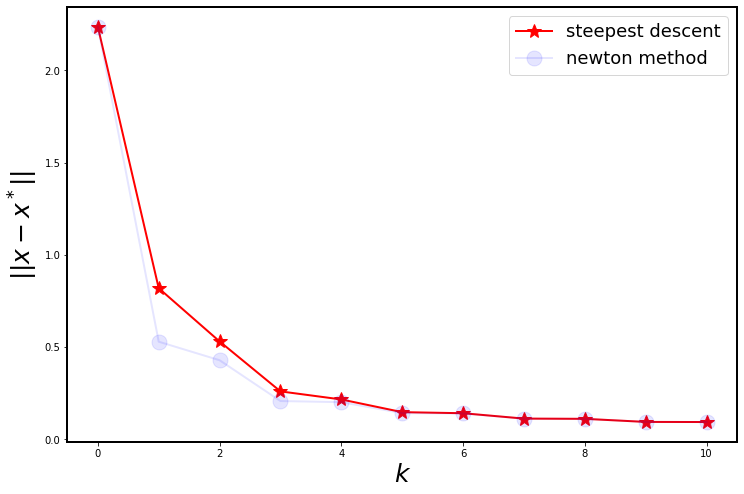

In [91]:
dist1 = []
dist2 = []

for i in range(len(X_cache)):
    d1 = np.sqrt(X_cache_steepest_minimization[i][0]**2 + X_cache[i][1]**2)
    d2 = np.sqrt(X_cache_newton_minimization[i][0]**2 + X_cache[i][1]**2)
    
    dist1.append(d1)
    dist2.append(d2)
    

f = plt.figure(figsize=(12, 8))
plt.rc('axes', linewidth=2)

plt.plot([k for k in range(len(dist1))], dist1, '-*', color='red', markersize=15, lw=2.0, label='steepest descent')
plt.plot([k for k in range(len(dist2))], dist2, '-o', color='blue', markersize=15, lw=2.0, label='newton method', alpha=0.1)


plt.ylabel('$||x-x^*||$', size=25)
plt.xlabel('$k$', size=25)
plt.legend(fontsize=18)
f.savefig("comparison_g.pdf", bbox_inches='tight')